# Close cross Ema - Strategy - Backtesting 

### Import Library

In [209]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

### Load Price Data

In [210]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [211]:
data = dataset.copy()

In [212]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']
# data = data[data.index > '2024-06-11 00:00:00']

In [213]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627


In [214]:
def get_signal(r):
    signal = ''
    if r['ema_fast'] < r['ema_low'] and r['ema_low'] - r['ema_fast'] < 6.9 and r['Open'] < r['ema_low'] < r['Close']:
        signal = 'long'
    elif r['ema_fast'] > r['ema_low'] and r['ema_fast'] - r['ema_low'] < 6.9 and r['Open'] > r['ema_low'] > r['Close']:
        signal = 'short'
    #
    if signal == '':
        if r['ema_fast_s1'] < r['ema_low_s1'] and r['ema_fast'] > r['ema_low']:
            signal = 'long'
        elif r['ema_fast_s1'] > r['ema_low_s1'] and r['ema_fast'] < r['ema_low']:
            signal = 'short'
    return signal

In [215]:
def get_signal2(r):
    signal = ''
    if r['ema_fast_s1'] < r['ema_low_s1'] and r['ema_fast'] > r['ema_low']:
        signal = 'long'
    elif r['ema_fast_s1'] > r['ema_low_s1'] and r['ema_fast'] < r['ema_low']:
        signal = 'short'
    return signal

In [216]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data["ema_fast"] = ta.ema(data["Close"], length=20)
    data["ema_low"] = ta.ema(data["Close"], length=250)
    data['ema_fast_s1'] = data['ema_fast'].shift(1)
    data['ema_low_s1'] = data['ema_low'].shift(1)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [217]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [218]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,ema_fast_s1,ema_low_s1,signal
Date,,,,,,,,,,,,
2020-11-06 14:15:00,911.0,912.7,910.5,910.6,5948,912.7,903.5,907.880896,908.796883,907.594675,908.782400,
2020-11-06 14:20:00,910.7,911.2,909.4,910.9,4466,912.7,903.5,908.168430,908.813641,907.880896,908.796883,
2020-11-06 14:25:00,910.5,911.0,908.5,910.0,3602,912.7,904.4,908.342865,908.823094,908.168430,908.813641,
2020-11-06 14:30:00,910.5,910.7,910.5,910.7,78,912.7,906.2,908.567354,908.838049,908.342865,908.823094,
2020-11-06 14:45:00,908.3,908.3,908.3,908.3,4462,912.7,906.7,908.541892,908.833762,908.567354,908.838049,
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524,1300.9,1295.6,1297.302274,1287.412327,1297.334093,1287.335318,
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161,1300.9,1295.9,1297.283010,1287.489520,1297.302274,1287.412327,
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627,1300.9,1295.9,1297.389390,1287.576456,1297.283010,1287.489520,


In [219]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,ema_fast_s1,ema_low_s1,signal
Date,,,,,,,,,,,,
2024-10-15 14:00:00,1358.1,1360.5,1356.6,1360.5,9766,1364.8,1356.6,1361.595279,1361.682961,1361.710572,1361.692463,short
2024-10-17 14:10:00,1354.7,1359.6,1354.6,1359.6,11098,1359.6,1349.0,1353.105948,1357.674451,1352.422364,1357.658985,long
2024-10-18 09:05:00,1376.5,1376.5,1374.5,1374.6,5041,1377.9,1353.2,1358.840761,1357.982251,1357.181894,1357.848775,long
2024-10-22 09:30:00,1361.3,1362.0,1361.2,1361.6,3836,1364.7,1359.2,1363.030852,1363.138164,1363.181468,1363.150518,short
2024-10-31 09:05:00,1338.9,1339.7,1338.9,1339.7,1286,1342.0,1331.5,1336.510228,1339.404440,1336.174462,1339.402066,long
2024-10-31 13:05:00,1338.4,1340.3,1338.2,1339.7,6778,1340.3,1335.1,1337.189955,1338.882787,1336.925740,1338.876223,long
2024-10-31 13:25:00,1338.7,1339.8,1338.6,1339.6,2563,1340.4,1336.8,1337.773839,1338.884202,1337.581612,1338.878452,long
2024-10-31 13:45:00,1342.5,1345.3,1342.2,1343.8,16422,1345.3,1337.4,1339.071768,1338.968548,1338.574059,1338.929741,long
2024-11-01 09:00:00,1340.4,1340.4,1337.5,1337.8,10641,1347.8,1337.5,1341.888654,1339.369588,1342.319039,1339.382195,short


In [220]:
MAX_SL = 3.1
class MainStrategy(Strategy):
    max_sl = MAX_SL
    trailing_sl = 7
    tp_step = 30
    def init(self):
        self._broker._cash = 1500
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        signal = self.data.signal[-1]
        if self.position:
            if signal == 'long' and self.position.is_short:
                self.position.close()
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short' and self.position.is_long:
                sell_price = close_price
                self.position.close()
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)
        else:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short':
                sell_price = close_price
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)

In [221]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [222]:
stats

Start                     2020-11-06 14:15:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:50:00
Exposure Time [%]                   26.061312
Equity Final [$]                   2300.03238
Equity Peak [$]                    2308.33238
Return [%]                          53.335492
Buy & Hold Return [%]               42.565342
Return (Ann.) [%]                   11.219669
Volatility (Ann.) [%]                6.444635
Sharpe Ratio                         1.740932
Sortino Ratio                        3.718765
Calmar Ratio                         1.339046
Max. Drawdown [%]                   -8.378852
Avg. Drawdown [%]                   -0.313998
Max. Drawdown Duration      429 days 02:55:00
Avg. Drawdown Duration        5 days 12:36:00
# Trades                                  586
Win Rate [%]                        28.156997
Best Trade [%]                        3.16148
Worst Trade [%]                     -2.508328
Avg. Trade [%]                    

In [223]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
566,1,49042,49150,1304.89135,1334.0,29.10865,0.022307,2024-09-18 09:05:00,2024-09-20 09:45:00,None,2 days 00:40:00
567,-1,49586,49593,1354.09365,1357.9,-3.80635,-0.002811,2024-10-02 13:30:00,2024-10-02 14:05:00,None,0 days 00:35:00
568,-1,49639,49642,1356.79284,1360.3,-3.50716,-0.002585,2024-10-03 13:40:00,2024-10-03 13:55:00,None,0 days 00:15:00
569,-1,49646,49648,1356.39296,1357.6,-1.20704,-0.000890,2024-10-03 14:15:00,2024-10-03 14:25:00,None,0 days 00:10:00
570,-1,49652,49753,1350.29479,1340.0,10.29479,0.007624,2024-10-04 09:05:00,2024-10-08 09:00:00,None,3 days 23:55:00
571,1,49796,49797,1349.20464,1345.7,-3.50464,-0.002598,2024-10-08 14:00:00,2024-10-08 14:05:00,None,0 days 00:05:00
572,1,49815,49823,1348.60446,1345.3,-3.30446,-0.002450,2024-10-09 09:55:00,2024-10-09 10:35:00,None,0 days 00:40:00
573,1,49828,49899,1348.30437,1364.8,16.49563,0.012234,2024-10-09 11:00:00,2024-10-10 14:05:00,None,1 days 03:05:00
574,-1,50004,50010,1360.49173,1363.1,-2.60827,-0.001917,2024-10-14 14:20:00,2024-10-15 09:10:00,None,0 days 18:50:00
575,-1,50030,50043,1360.39176,1364.0,-3.60824,-0.002652,2024-10-15 10:50:00,2024-10-15 13:20:00,None,0 days 02:30:00


In [224]:
stats['_trades']['PnL'].min()

-32.08360999999991

In [225]:
trades = stats['_trades']

In [226]:
trades[trades.PnL < -MAX_SL]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
3,-1,306,306,916.82487,920.4,-3.57513,-0.003899,2020-11-16 14:25:00,2020-11-16 14:25:00,None,0 days 00:00:00
8,-1,1475,1482,1016.69490,1025.6,-8.90510,-0.008759,2020-12-17 14:05:00,2020-12-18 09:00:00,None,0 days 18:55:00
9,-1,1703,1706,1032.69010,1035.8,-3.10990,-0.003011,2020-12-24 10:25:00,2020-12-24 10:40:00,None,0 days 00:15:00
17,1,3323,3323,1110.23297,1106.4,-3.83297,-0.003452,2021-02-09 09:40:00,2021-02-09 09:40:00,None,0 days 00:00:00
21,1,3770,3772,1189.35670,1185.9,-3.45670,-0.002906,2021-03-01 09:15:00,2021-03-01 09:25:00,None,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...
571,1,49796,49797,1349.20464,1345.7,-3.50464,-0.002598,2024-10-08 14:00:00,2024-10-08 14:05:00,None,0 days 00:05:00
572,1,49815,49823,1348.60446,1345.3,-3.30446,-0.002450,2024-10-09 09:55:00,2024-10-09 10:35:00,None,0 days 00:40:00
575,-1,50030,50043,1360.39176,1364.0,-3.60824,-0.002652,2024-10-15 10:50:00,2024-10-15 13:20:00,None,0 days 02:30:00
579,1,50622,50626,1340.00188,1336.6,-3.40188,-0.002539,2024-10-31 09:10:00,2024-10-31 09:30:00,None,0 days 00:20:00


In [227]:
trades[trades.PnL < -MAX_SL]['PnL'].sum()

-1159.1460299999667

In [228]:
len(trades[trades.PnL < -MAX_SL]) * -3.1

-914.5

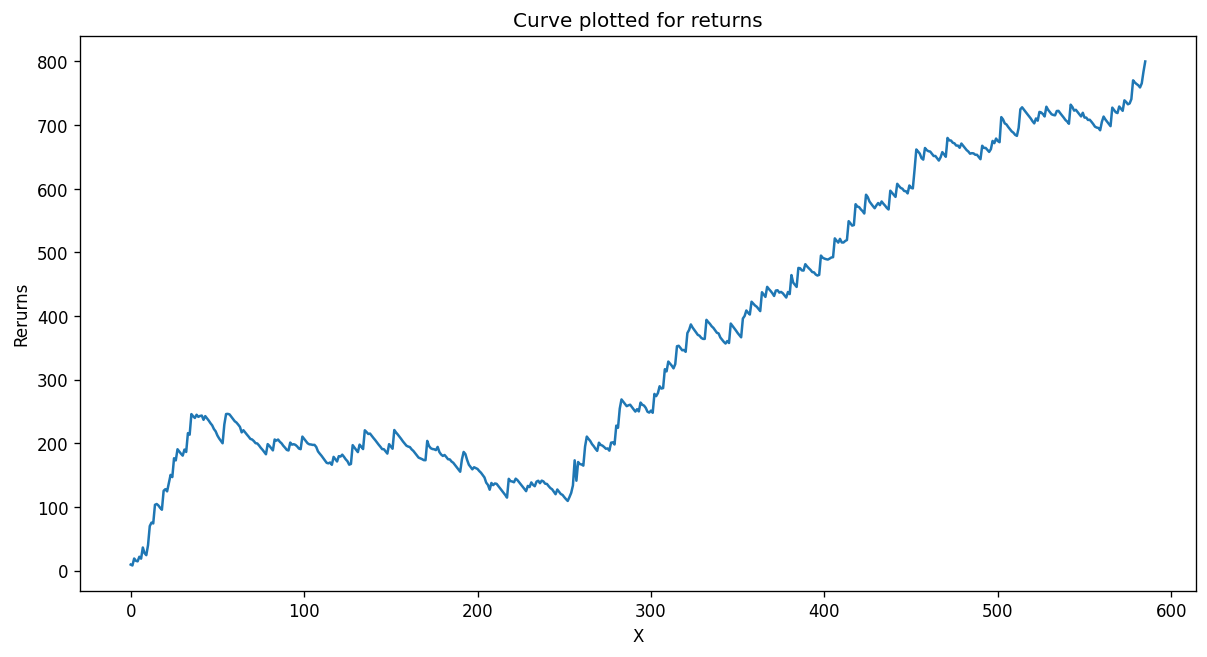

In [229]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()

## Optimize

In [139]:
max_sl_params = [x / 10.0 for x in range(20, 50, 2)]
trailing_sl_params = [x / 10.0 for x in range(30, 100, 5)]
tp_step_params = [x for x in range(10, 30)]

In [140]:
trailing_sl_params

[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

In [141]:
optimize_stats, optimize_table = bt.optimize(
                                      trailing_sl=trailing_sl_params,
                                      tp_step=tp_step_params,
                    maximize='Return [%]', 
                    random_state=0,
                    return_heatmap=True)

In [142]:
optimize_stats

Start                     2020-11-06 14:15:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:50:00
Exposure Time [%]                   25.523865
Equity Final [$]                  10768.23238
Equity Peak [$]                   10776.53238
Return [%]                           7.682324
Buy & Hold Return [%]               42.565342
Return (Ann.) [%]                    1.858304
Volatility (Ann.) [%]                1.024223
Sharpe Ratio                         1.814356
Sortino Ratio                        3.496199
Calmar Ratio                         1.251862
Max. Drawdown [%]                   -1.484432
Avg. Drawdown [%]                   -0.058121
Max. Drawdown Duration      431 days 22:40:00
Avg. Drawdown Duration        5 days 12:52:00
# Trades                                  586
Win Rate [%]                        28.156997
Best Trade [%]                        2.98267
Worst Trade [%]                     -2.508328
Avg. Trade [%]                    

In [143]:
optimize_table

trailing_sl  tp_step
3.0          10         0.851153
             11         0.808678
             12         0.829502
             13         1.217303
             14         1.461624
                          ...   
9.5          25         5.783330
             26         5.890330
             27         6.177330
             28         6.340330
             29         6.456596
Name: Return [%], Length: 280, dtype: float64

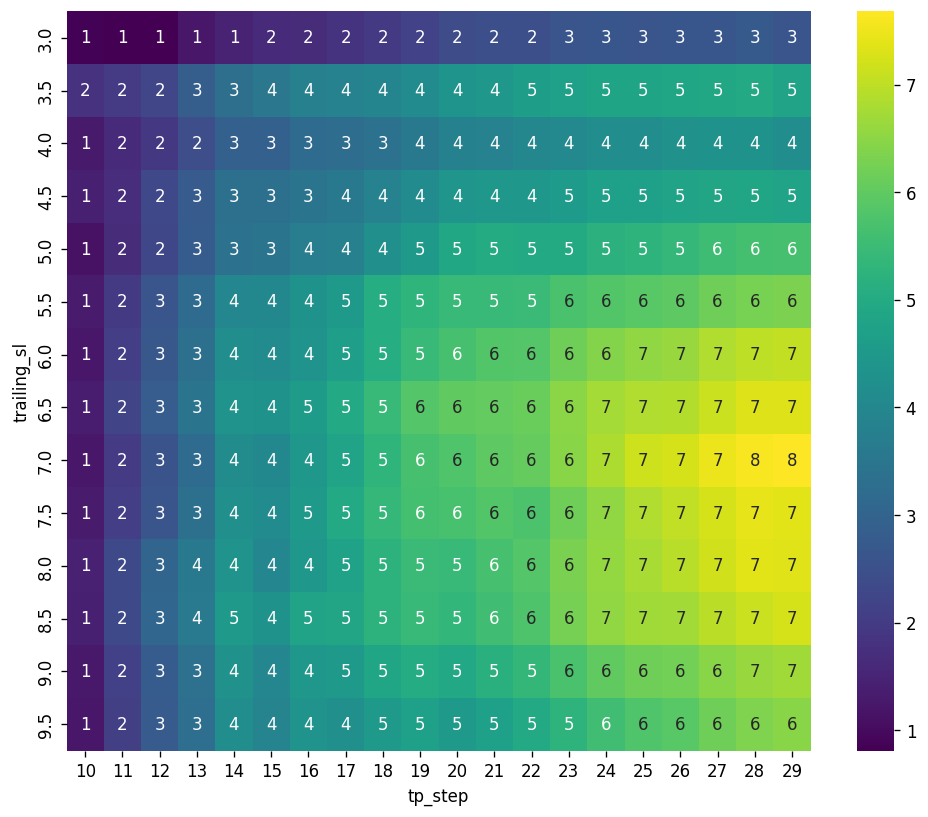

In [144]:
import seaborn as sns
# Convert multiindex series to dataframe
heatmap_df = optimize_table.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()